patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860


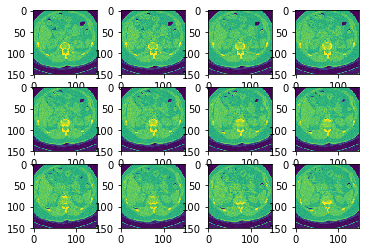

patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053


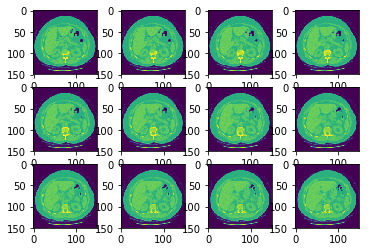

In [1]:
#read luna Dataset
# and PReprocess using sentdex
#This code can be ignored just testing
from scipy import misc
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import os
    
#address to luna Dir
data_dir ="C:/Users/hunbl/Desktop/hunble/luna/"
patients = os.listdir(data_dir)


IMG_PX_SIZE = 150
#labels_df.head()

for patient in patients[:2]:
    path = data_dir + patient
    slices = []
    for image_path in glob.glob(path+"/*i.png"):
        image = misc.imread(image_path)
        #print (image.shape)
        #print (image.dtype)
        slices.append(image)


        
    fig =  plt.figure()
    print("patient ID: ",patient)
    
    for num,each_slice in enumerate(slices[12:24]):
        y= fig.add_subplot(3,4,num+1)
        new_image = cv2.resize(np.array(each_slice),(IMG_PX_SIZE,IMG_PX_SIZE))
        plt.imshow(new_image)
    plt.show()    
        


In [2]:
#Creating Numpy_MuchData for SentDex form LUNA & KAggle 2 PNGS
####################ADDED#####################
from scipy import misc
import glob
##############################################

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import math
import pandas as pd
#pip install opencv-python

#################ADDED#################
#address to luna Dir
data_dir ="F:/FYP Data/luna16_extracted_images/"
labels_df = pd.read_csv('D:/luna_labels.csv',index_col=0)
patients = os.listdir(data_dir)
datasetName = 'luna_images'
#######################################



IMG_PX_SIZE = 32
HM_SLICES = 32

def chunks(l,n):
    for i in range (0, len(l),n):
        yield l[i:i+n]

def mean(l):
    return sum(l)/len(l)

def process_data(patient, label_df, img_px_size=50, hm_slices=20,visualize=False):
    label = labels_df.get_value(patient, 'cancer')
##################Added##############################
    path = data_dir + patient
    slices = []
    for image_path in glob.glob(path+"/*i.png"):
        image = misc.imread(image_path)
        #print (image.shape)
        #print (image.dtype)
        slices.append(image)
#######################################################

    new_slices =[]
    
    slices = [cv2.resize(np.array(each_slice),(img_px_size,img_px_size)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices)/hm_slices)
    
    for slices_chunk in chunks(slices,chunk_sizes):
        slices_chunk= list(map(mean,zip(*slices_chunk)))
        new_slices.append(slices_chunk)
        
    if len(new_slices) == hm_slices-1:
        new_slices.append(new_slices[-1])
        
    if len(new_slices) == hm_slices-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

        
    if len(new_slices) == hm_slices-3:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
   
    if len(new_slices) == hm_slices-4:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        
    if len(new_slices) == hm_slices-5:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-6:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        
        
    if len(new_slices) == hm_slices-7:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])        
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-8:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])        
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices-9:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])        
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])        
        
    if len(new_slices) == hm_slices+2:
        new_val = list(map(mean,zip(*[new_slices[hm_slices-1]],new_slices[hm_slices])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1]*new_val
        
    if len(new_slices) == hm_slices+1:
        new_val = list(map(mean,zip(*[new_slices[hm_slices-1]],new_slices[hm_slices])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1]*new_val
        
    print("patient ID: ",patient)
    if(visualize):      
        print("Slices Length: ",len(new_slices))
        fig=plt.figure()
        for num,each_slice in enumerate(new_slices):
            y= fig.add_subplot(4,5,num+1)
            plt.imshow(each_slice)
        plt.show()
    
    if label == 1: label = np.array([0,1])
    elif label == 0 : label = np.array([1,0])
        
    return np.array(new_slices),label

much_data=[]
 
for num,patient in enumerate(patients):
    if num%100==0:
        print(num)
    try:
        img_data,label = process_data(patient,labels_df, img_px_size=IMG_PX_SIZE, hm_slices=HM_SLICES)
        much_data.append([img_data, label,patient])
    except KeyError as e:
        print ("This is unlabeled Data")
        
np.save('muchdata-{}-{}-{}-{}.npy'.format(datasetName,IMG_PX_SIZE,IMG_PX_SIZE, HM_SLICES),much_data)

0
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482151095585000946543
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100684836163890911914061745866
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028192176989979435275
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.101228986346984399347858840086
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.102133688497886810253331438797
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.103115201714075993579787468219
patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.104562737760173

patient ID:  1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
cancer status:  [1 0]


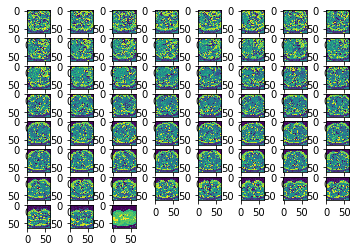

In [2]:
##############Test for muchdata luna - kaggle 2
import matplotlib.pyplot as plt
import numpy as np

much_data = np.load('muchdata-luna-64-64-64.npy')

fig =  plt.figure()
print("patient ID: ",much_data[0][2])
print("cancer status: ",much_data[0][1])

for num,each_slice in enumerate(much_data[0][0]):
    y= fig.add_subplot(8,8,num+1)
    plt.imshow(each_slice)
plt.show()  

In [ ]:
for num,data in enumerate(much_data):
    if(data[0].shape!=(32,32,32)):
        print(data[0].shape)